In [10]:
#--------------Required Modules---------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#--------------Loading Processed Dataset-------------------
df = pd.read_csv('../Elevate-Labs-AI_ML/Task-2/datasets/titanic_processed.csv')
df = df.drop(columns=['PassengerId'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,-0.565736,1,0,-0.502445,0,1
1,1,1,0,0.663861,1,0,0.786845,0,0
2,1,3,0,-0.258337,0,0,-0.488854,0,1
3,1,1,0,0.433312,1,0,0.420730,0,1
4,0,3,1,0.433312,0,0,-0.486337,0,1


In [16]:
# Generate summary statistics (mean, median, std, etc.).
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,0.377203,2.357227,0.650999,-0.065384,0.526439,0.368978,-0.123099,0.088132,0.732080
std,0.484971,0.812696,0.476935,0.917680,1.111520,0.797157,0.577644,0.283653,0.443136
min,0.000000,1.000000,0.000000,-2.224156,0.000000,0.000000,-0.648422,0.000000,0.000000
25%,0.000000,2.000000,0.000000,-0.565736,0.000000,0.000000,-0.489442,0.000000,0.000000
50%,0.000000,3.000000,1.000000,-0.104637,0.000000,0.000000,-0.376603,0.000000,1.000000
75%,1.000000,3.000000,1.000000,0.356462,1.000000,0.000000,-0.050421,0.000000,1.000000
max,1.000000,3.000000,1.000000,2.431407,8.000000,6.000000,2.441498,1.000000,1.000000


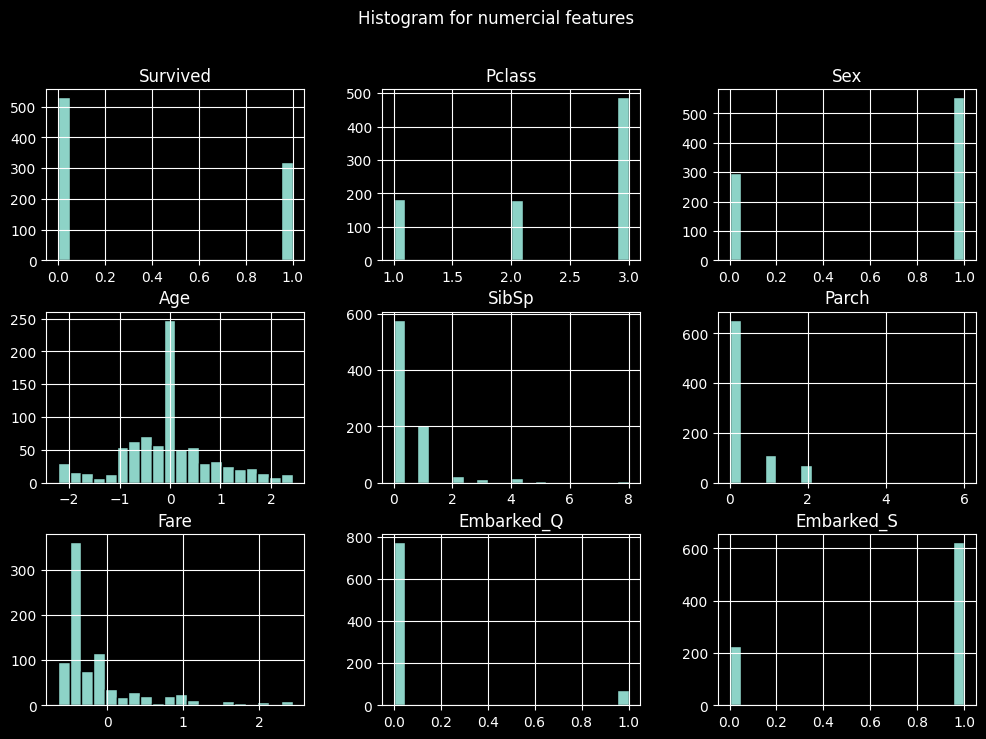

In [17]:
# Understand the distribution of numeric features.

df.hist(bins=20 , figsize=(12,8) , edgecolor ='black')
plt.suptitle('Histogram for numercial features')
plt.show()

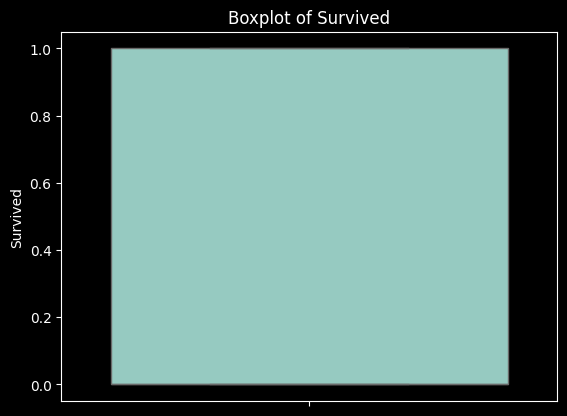

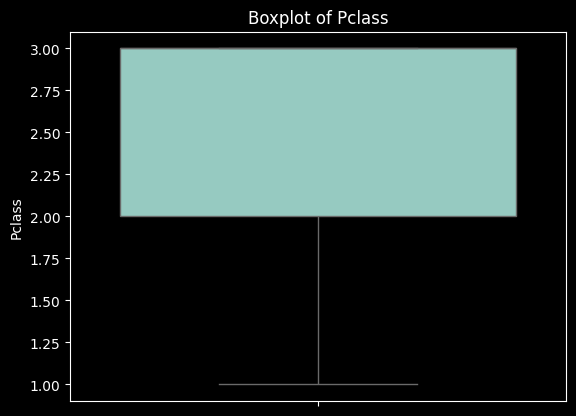

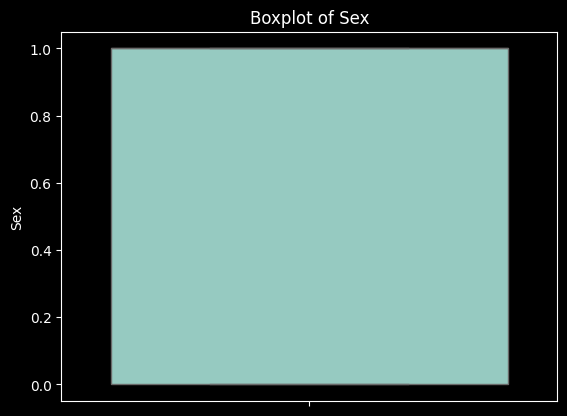

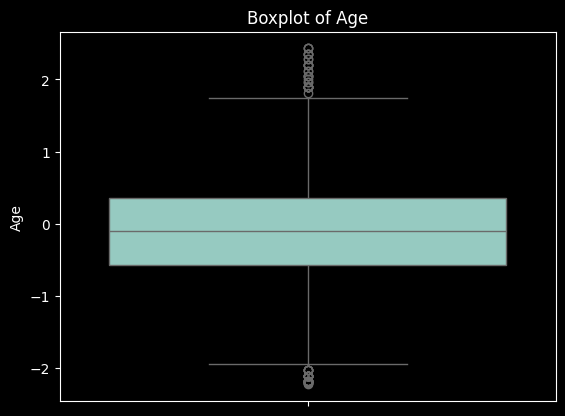

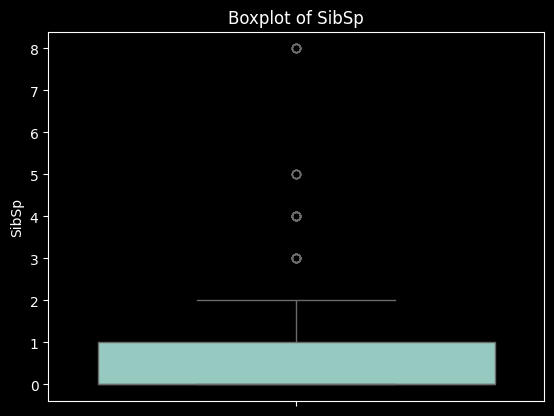

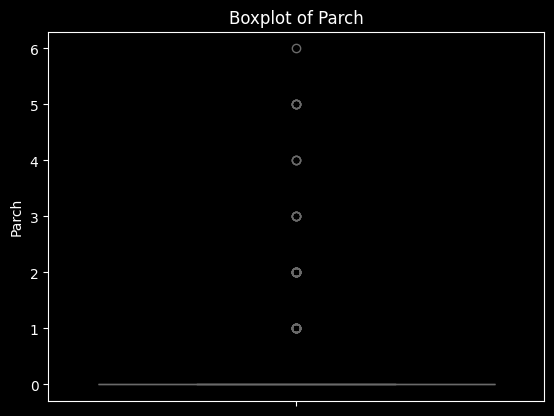

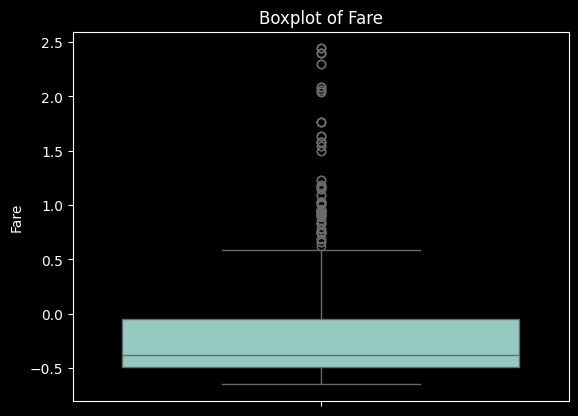

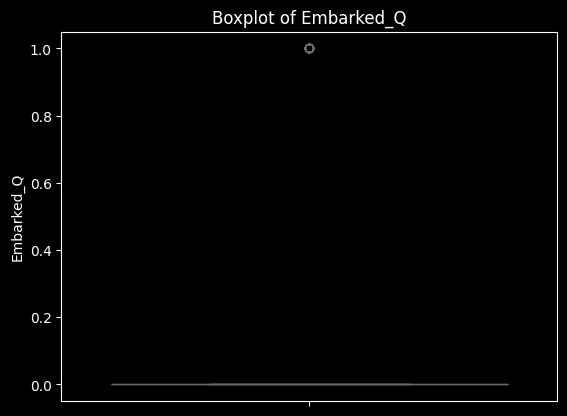

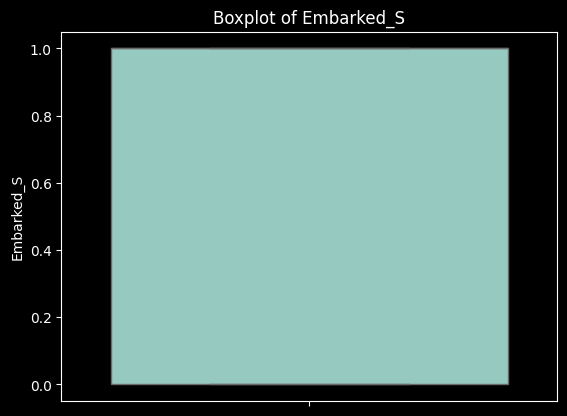

In [20]:
# Detect outliers and compare distributions

num_cols = df.select_dtypes(include =['int64','float64']).columns

for col in num_cols:
    sns.boxplot(y = df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Pairplot/correlation matrix for feature relationships.

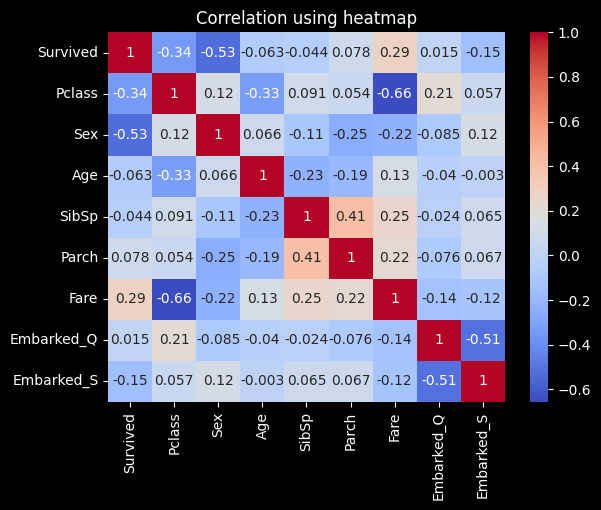

In [24]:
corr = df.corr()
sns.heatmap(corr  , annot=True , cmap = 'coolwarm')
plt.title('Correlation using heatmap')
plt.show()

Pairwise relationships + distribution

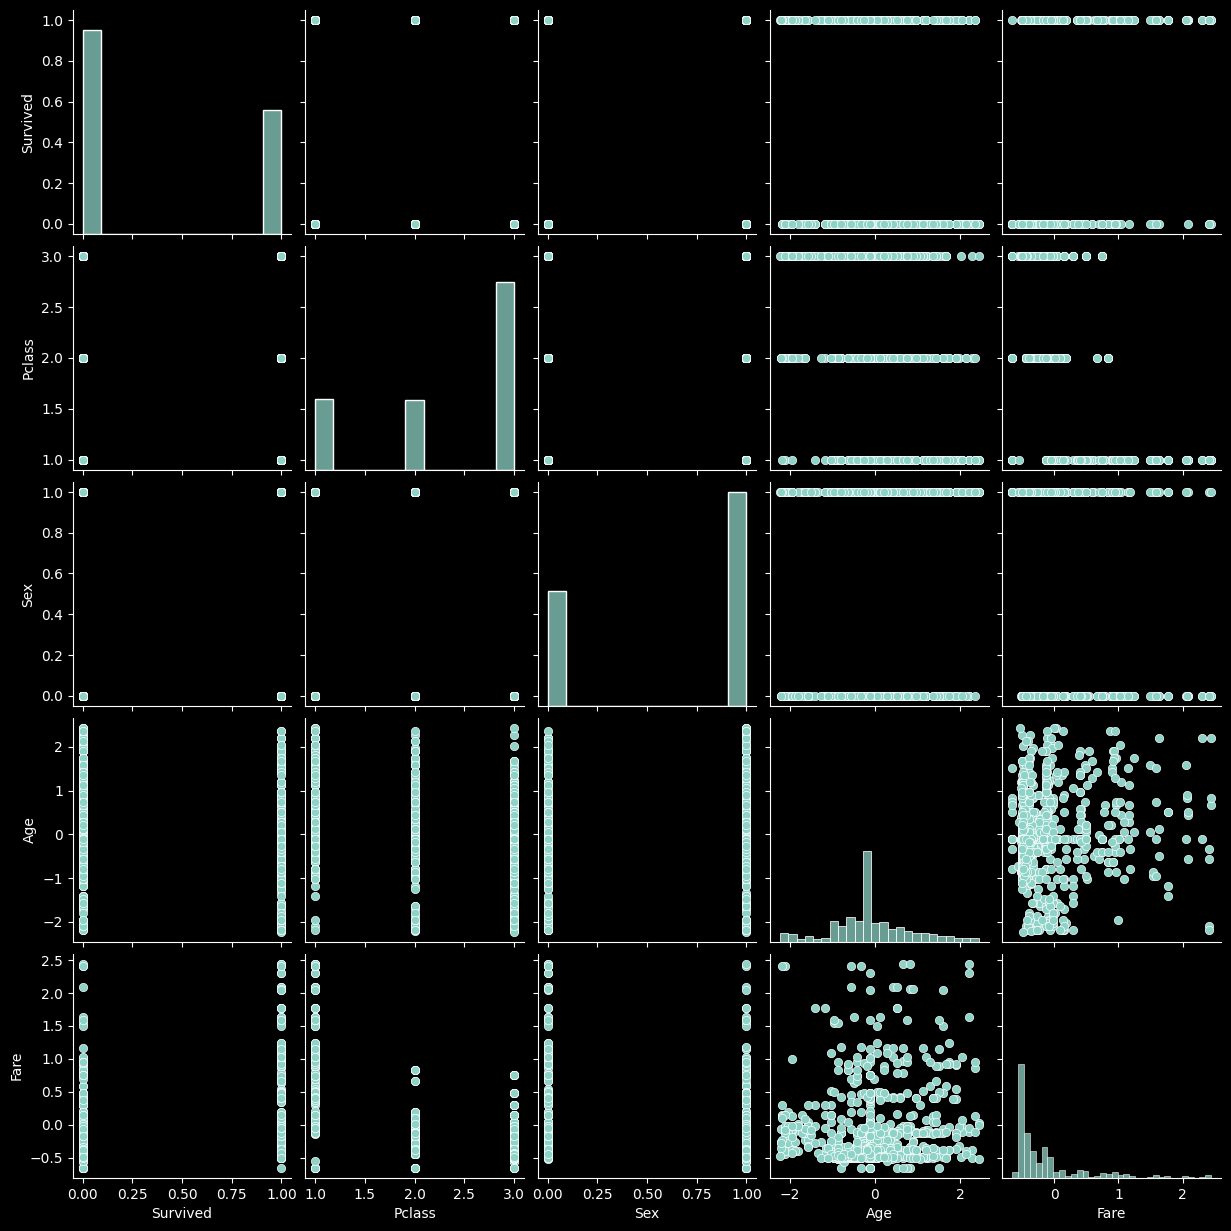

In [25]:
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']])
plt.show()


In [ ]:
import numpy as np

correlation_matrix = df.corr()

inferences = []

#-------------------SURVIVAL RATE BASED ON GENDER----------------------
survival_by_sex = df.groupby('Sex')['Survived'].mean()
if survival_by_sex[0] > survival_by_sex[1]:
    inferences.append("Females had a higher survival rate than males.")
else:
    inferences.append("Males had a higher survival rate than females.")

survival_by_class = df.groupby('Pclass')['Survived'].mean()
class_with_highest_survival = survival_by_class.idxmax()
inferences.append(f"Passengers in class {class_with_highest_survival} had the highest survival rate.")

#-------------------SURVIVAL RATE BASED ON FARE------------------------
if df['Fare'].corr(df['Survived']) > 0:
    inferences.append("Higher fare is positively correlated with survival.")

age_outliers = df[(df['Age'] < -2) | (df['Age'] > 2)]
if not age_outliers.empty:
    inferences.append("There are some extreme age values (outliers) present in the dataset.")

embarked_counts = df[['Embarked_Q', 'Embarked_S']].sum()
dominant_port = 'S' if embarked_counts['Embarked_S'] > embarked_counts['Embarked_Q'] else 'Q'
inferences.append(f"Most passengers embarked from port {dominant_port}.")

correlation_matrix, inferences


(            Survived    Pclass       Sex       Age     SibSp     Parch  \
 Survived    1.000000 -0.339299 -0.528831 -0.062832 -0.043621  0.077777   
 Pclass     -0.339299  1.000000  0.124738 -0.330987  0.091117  0.054172   
 Sex        -0.528831  0.124738  1.000000  0.065628 -0.107961 -0.248833   
 Age        -0.062832 -0.330987  0.065628  1.000000 -0.231113 -0.186680   
 SibSp      -0.043621  0.091117 -0.107961 -0.231113  1.000000  0.409877   
 Parch       0.077777  0.054172 -0.248833 -0.186680  0.409877  1.000000   
 Fare        0.294815 -0.655986 -0.222981  0.131754  0.253981  0.221473   
 Embarked_Q  0.014622  0.210304 -0.085440 -0.040050 -0.024191 -0.076345   
 Embarked_S -0.153267  0.056997  0.124845 -0.002993  0.064557  0.067031   
 
                 Fare  Embarked_Q  Embarked_S  
 Survived    0.294815    0.014622   -0.153267  
 Pclass     -0.655986    0.210304    0.056997  
 Sex        -0.222981   -0.085440    0.124845  
 Age         0.131754   -0.040050   -0.002993  
 SibSp  